In [ ]:
from google.colab import files
uploaded = files.upload()

Saving QVI_transaction_data.csv to QVI_transaction_data.csv
Saving QVI_purchase_behaviour.csv to QVI_purchase_behaviour.csv


In [ ]:
import pandas as pd

# Load both CSVs
purchase_df = pd.read_csv('QVI_purchase_behaviour.csv')
transaction_df = pd.read_csv('QVI_transaction_data.csv')

In [ ]:
purchase_df.head()


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [ ]:
transaction_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [ ]:
purchase_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [ ]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [ ]:
purchase_df.isna().sum()

,0
LYLTY_CARD_NBR,0
LIFESTAGE,0
PREMIUM_CUSTOMER,0


In [ ]:
transaction_df.isna().sum()

,0
DATE,0
STORE_NBR,0
LYLTY_CARD_NBR,0
TXN_ID,0
PROD_NBR,0
PROD_NAME,0
PROD_QTY,0
TOT_SALES,0


In [ ]:
transaction_df['DATE']= pd.to_datetime(transaction_df['DATE'], origin='1899-12-30', unit='D')

In [ ]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB


In [ ]:
transaction_df['PROD_NAME'].unique()[1:50]

array(['CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'Kettle Original 175g',
       'Red Rock Deli Thai 

We can see that there are typos such as 'chp' or 'chps' so we have to handle those and include them in our analysis.

In [ ]:
non_chip_products= transaction_df[transaction_df['PROD_NAME'].str.lower().str.contains('salsa')]

In [ ]:
non_chip_products.tail()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
264675,2019-04-20,265,265103,263419,59,Old El Paso Salsa Dip Tomato Med 300g,1,5.1
264678,2019-03-30,265,265111,263428,35,Woolworths Mild Salsa 300g,1,1.5
264719,2018-10-28,266,266278,264104,39,Smiths Crinkle Cut Tomato Salsa 150g,1,2.6
264734,2019-01-11,267,267324,264374,41,Doritos Salsa Mild 300g,1,2.6
264780,2019-01-10,269,269222,266382,64,Red Rock Deli SR Salsa & Mzzrlla 150g,2,5.4


In [ ]:
non_chip_products['PROD_NAME'].unique()

array(['Old El Paso Salsa   Dip Tomato Mild 300g',
       'Red Rock Deli SR    Salsa & Mzzrlla 150g',
       'Smiths Crinkle Cut  Tomato Salsa 150g',
       'Doritos Salsa       Medium 300g',
       'Old El Paso Salsa   Dip Chnky Tom Ht300g',
       'Woolworths Mild     Salsa 300g',
       'Old El Paso Salsa   Dip Tomato Med 300g',
       'Woolworths Medium   Salsa 300g', 'Doritos Salsa Mild  300g'],
      dtype=object)

In [ ]:
non_chip_products.shape

(18094, 8)

In [ ]:
transaction_df= transaction_df.drop(non_chip_products.index).reset_index(drop=True)

Summarizing Individual Words

In [ ]:
from collections import Counter
import re

all_product_names= ''.join(transaction_df['PROD_NAME'].str.lower())

cleaned_text= re.sub(r'[^a-z\s]', '', all_product_names)


In [ ]:
words= cleaned_text.split()

In [ ]:
word_count= Counter(words)
top_words= word_count.most_common(20)

In [ ]:
print(top_words)

[('chips', 49770), ('gkettle', 39247), ('cheese', 27890), ('gsmiths', 25753), ('salt', 24719), ('gpringles', 23779), ('crinkle', 22490), ('corn', 22063), ('original', 21560), ('gdoritos', 20958), ('cut', 19284), ('chip', 18645), ('chicken', 15407), ('sea', 14145), ('chilli', 13895), ('sour', 13882), ('gthins', 13311), ('crisps', 12607), ('vinegar', 12402), ('grrd', 11128)]


In [ ]:
transaction_df['PROD_NAME'].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'Kettle Original 175g',
       'Red Rock Deli Thai  C

In [ ]:
transaction_df.describe(include='all')

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
count,246742,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742,246742.000000,246742.000000
unique,NaN,NaN,NaN,NaN,NaN,105,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Kettle Mozzarella Basil & Pesto 175g,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,3304,NaN,NaN
mean,2018-12-30 01:19:01.211467520,135.051098,1.355310e+05,1.351311e+05,56.351789,NaN,1.908062,7.321322
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,NaN,1.000000,1.700000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756925e+04,26.000000,NaN,2.000000,5.800000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351830e+05,53.000000,NaN,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030840e+05,2.026538e+05,87.000000,NaN,2.000000,8.800000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,NaN,200.000000,650.000000


In [ ]:
transaction_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
246737,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
246738,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
246739,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
246740,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


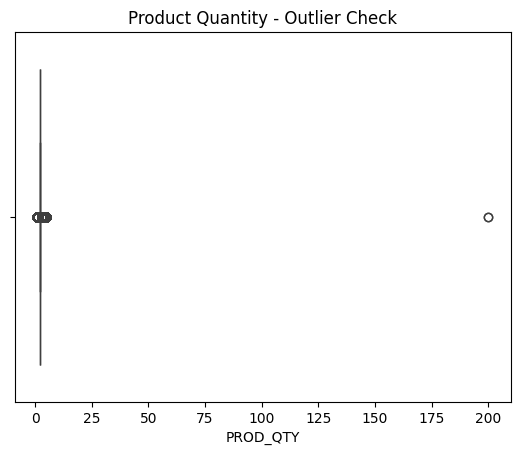

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data= transaction_df, x= 'PROD_QTY')
plt.title('Product Quantity - Outlier Check')
plt.show()

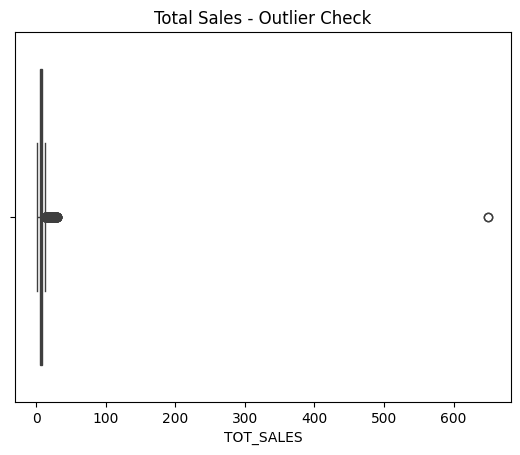

In [ ]:
sns.boxplot(data= transaction_df, x= 'TOT_SALES')
plt.title('Total Sales - Outlier Check')
plt.show()

In [ ]:
transaction_df[transaction_df['PROD_QTY']>5]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
64955,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
64956,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [ ]:
transaction_df[transaction_df['TOT_SALES']>30]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
64955,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
64956,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


Dropping outlier rows

In [ ]:
transaction_df= transaction_df.drop(transaction_df[transaction_df['PROD_QTY']>5].index).reset_index(drop=True)

Check Transaction Trends Over Time

In [ ]:
transaction_df['DATE'].head()

,DATE
0,2018-10-17
1,2019-05-14
2,2019-05-20
3,2018-08-17
4,2018-08-18


In [ ]:
  trans_per_day= transaction_df.groupby(transaction_df['DATE']).size()
date_range= pd.date_range(start='2018-07-01', end='2019-06-30')
trans_all= trans_per_day.reindex(date_range)
missing_dates= trans_all[trans_all.isna()]
print(missing_dates)



2018-12-25   NaN
Freq: D, dtype: float64


In [ ]:
trans_all

,0
2018-07-01,663.0
2018-07-02,650.0
2018-07-03,674.0
2018-07-04,669.0
2018-07-05,660.0
...,...
2019-06-26,657.0
2019-06-27,669.0
2019-06-28,673.0
2019-06-29,703.0


In [ ]:
trans_per_day.shape

(364,)

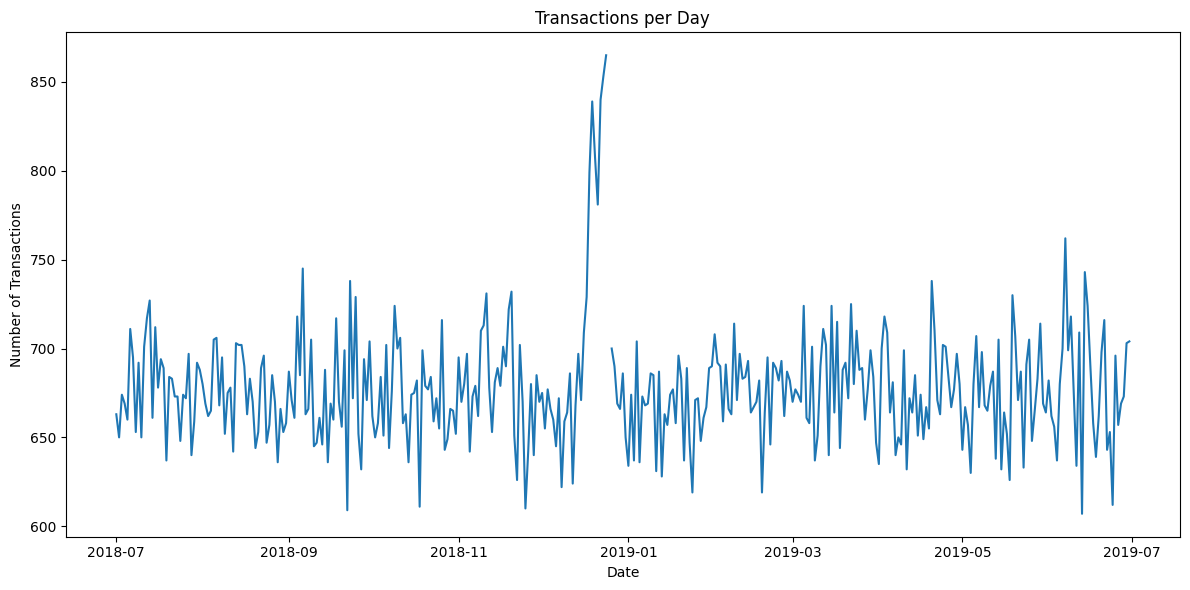

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(trans_all.index, trans_all.values)
plt.title('Transactions per Day')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.tight_layout()
plt.show()

Extracting Packet Size

In [ ]:
import re

transaction_df['PACK_SIZE']= transaction_df['PROD_NAME'].str.extract(r'(\d+)[gG]')
transaction_df['PACK_SIZE']= pd.to_numeric(transaction_df['PACK_SIZE'], errors='coerce')

In [ ]:
transaction_df['PACK_SIZE'].describe(include='all')

,PACK_SIZE
count,246740.000000
mean,175.583521
std,59.432118
min,70.000000
25%,150.000000
50%,170.000000
75%,175.000000
max,380.000000


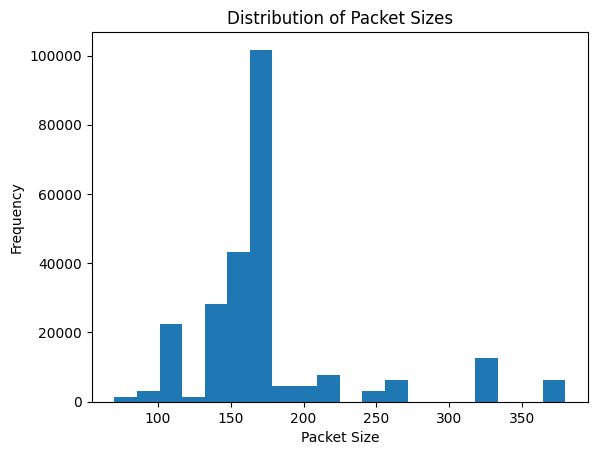

In [ ]:
plt.hist(transaction_df['PACK_SIZE'], bins=20)
plt.xlabel('Packet Size')
plt.ylabel('Frequency')
plt.title('Distribution of Packet Sizes')
plt.show()

Creating column-Brand Name

In [ ]:
transaction_df['BRAND_NAME']= transaction_df['PROD_NAME'].str.split().str[0]

In [ ]:
transaction_df['PROD_NAME'].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'Kettle Original 175g',
       'Red Rock Deli Thai  C

Brand Names contain inconsistencies so we map them accordingly.

In [ ]:
brand_mapping = {
    'RRD': 'Red Rock Deli',
    'RED': 'Red Rock Deli',
    'WW': 'Woolworths',
    'Snbts': 'Sunbites',
    'Infzns': 'Infuzions',
    'Infz': 'Infuzions',
    'NCC': 'Natural Chip Co',
    'Dorito': 'Doritos'}

transaction_df['BRAND_NAME']= transaction_df['BRAND_NAME'].replace(brand_mapping)

Examining Purchase Behaviour Data

In [ ]:
purchase_df.info()  #Correct Data Types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [ ]:
purchase_df.isna().sum()  # No null values

,0
LYLTY_CARD_NBR,0
LIFESTAGE,0
PREMIUM_CUSTOMER,0


In [ ]:
purchase_df['LIFESTAGE'].value_counts()
purchase_df['PREMIUM_CUSTOMER'].value_counts()

,count
PREMIUM_CUSTOMER,
Mainstream,29245
Budget,24470
Premium,18922


In [ ]:
pd.crosstab(purchase_df['PREMIUM_CUSTOMER'], purchase_df['LIFESTAGE'])

LIFESTAGE,MIDAGE SINGLES/COUPLES,NEW FAMILIES,OLDER FAMILIES,OLDER SINGLES/COUPLES,RETIREES,YOUNG FAMILIES,YOUNG SINGLES/COUPLES
PREMIUM_CUSTOMER,,,,,,,
Budget,1504,1112,4675,4929,4454,4017,3779
Mainstream,3340,849,2831,4930,6479,2728,8088
Premium,2431,588,2274,4750,3872,2433,2574


In [ ]:
purchase_df['LYLTY_CARD_NBR'].duplicated().sum()    # No duplicates found

np.int64(0)

Merge Both Files

In [ ]:
merge_df= pd.merge(transaction_df, purchase_df, on='LYLTY_CARD_NBR', how='left')

In [ ]:
merge_df.isna().sum()   # No nulls in merged data

,0
DATE,0
STORE_NBR,0
LYLTY_CARD_NBR,0
TXN_ID,0
PROD_NBR,0
PROD_NAME,0
PROD_QTY,0
TOT_SALES,0
PACK_SIZE,0
BRAND_NAME,0


In [ ]:
sales_summary= merge_df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['TOT_SALES'].sum()

In [ ]:
sales_summary

LIFESTAGE               PREMIUM_CUSTOMER
MIDAGE SINGLES/COUPLES  Budget               33345.70
                        Mainstream           84734.25
                        Premium              54443.85
NEW FAMILIES            Budget               20607.45
                        Mainstream           15979.70
                        Premium              10760.80
OLDER FAMILIES          Budget              156863.75
                        Mainstream           96413.55
                        Premium              75242.60
OLDER SINGLES/COUPLES   Budget              127833.60
                        Mainstream          124648.50
                        Premium             123537.55
RETIREES                Budget              105916.30
                        Mainstream          145168.95
                        Premium              91296.65
YOUNG FAMILIES          Budget              129717.95
                        Mainstream           86338.25
                        Premium              78571.70
YOUNG SINGLES/COUPLES   Budget               57122.10
                        Mainstream          147582.20
                        Premium              39052.30
Name: TOT_SALES, dtype: float64

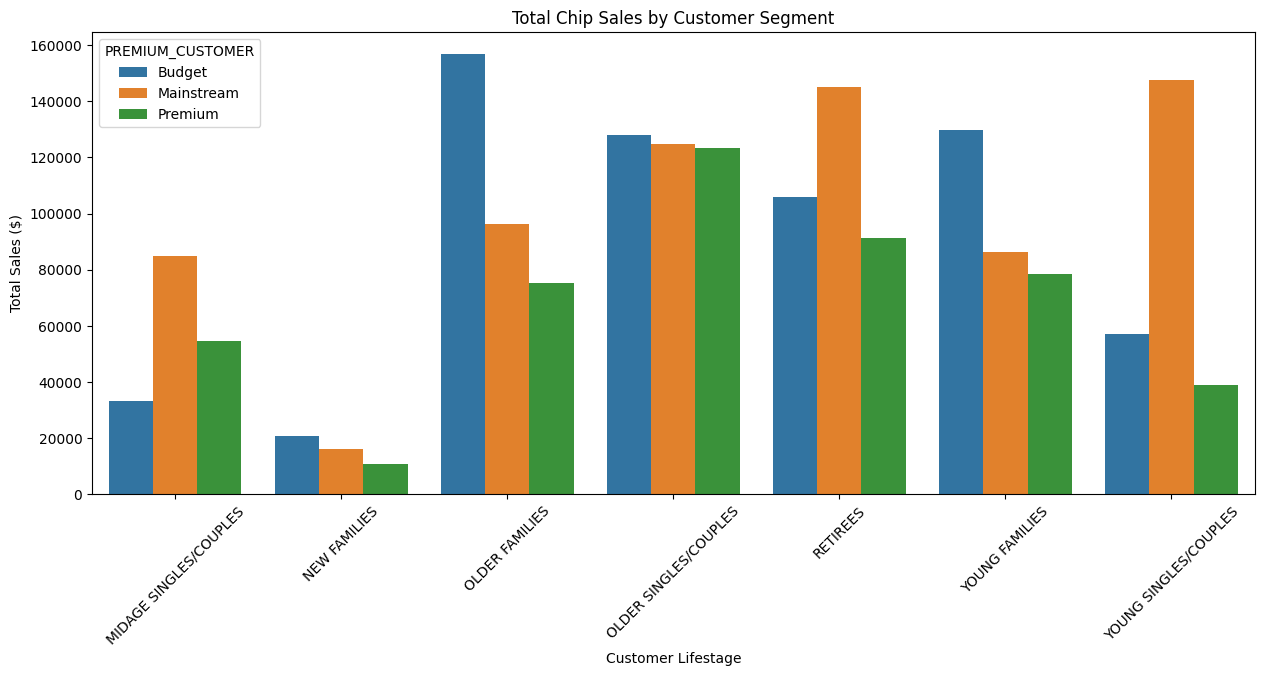

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
sns.barplot(data=sales_summary.reset_index(), x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER')
plt.title('Total Sales by Life Stage and Premium Customer')

plt.title('Total Chip Sales by Customer Segment')
plt.ylabel('Total Sales ($)')
plt.xlabel('Customer Lifestage')
plt.xticks(rotation=45)
plt.show()

In [ ]:
customers_summary= merge_df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique()

In [ ]:
customers_summary

LIFESTAGE               PREMIUM_CUSTOMER
MIDAGE SINGLES/COUPLES  Budget              1474
                        Mainstream          3298
                        Premium             2369
NEW FAMILIES            Budget              1087
                        Mainstream           830
                        Premium              575
OLDER FAMILIES          Budget              4611
                        Mainstream          2788
                        Premium             2231
OLDER SINGLES/COUPLES   Budget              4849
                        Mainstream          4858
                        Premium             4682
RETIREES                Budget              4385
                        Mainstream          6358
                        Premium             3812
YOUNG FAMILIES          Budget              3953
                        Mainstream          2685
                        Premium             2398
YOUNG SINGLES/COUPLES   Budget              3647
                        Mainstream          7917
                        Premium             2480
Name: LYLTY_CARD_NBR, dtype: int64

<Axes: xlabel='LIFESTAGE', ylabel='LYLTY_CARD_NBR'>

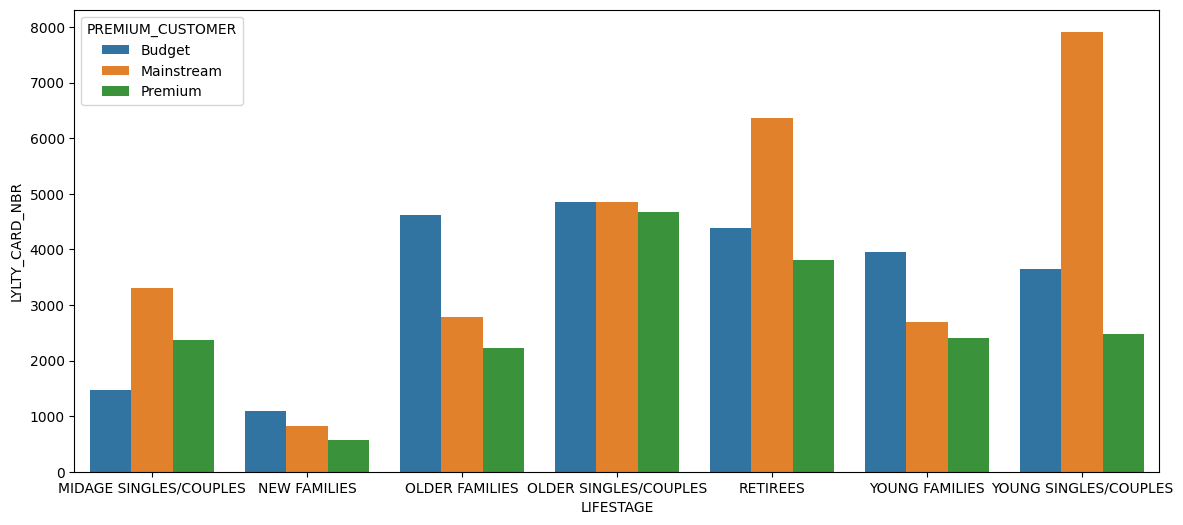

In [ ]:
plt.figure(figsize=(14, 6))
sns.barplot(
    data=customers_summary.reset_index(),
    x='LIFESTAGE',
    y='LYLTY_CARD_NBR',
    hue='PREMIUM_CUSTOMER'
)

In [ ]:
print(sales_summary.dtypes)
print(customers_summary.dtypes)

float64
int64


AVERAGE NUMBER OF UNITS PER CUSTOMER

In [ ]:
units_summary= merge_df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['PROD_QTY'].sum()

In [ ]:
avg_units_per_customer= (units_summary /customers_summary).reset_index(name='AVG_UNITS BY CUSTOMER')
print(avg_units_per_customer)

                 LIFESTAGE PREMIUM_CUSTOMER  AVG_UNITS BY CUSTOMER
0   MIDAGE SINGLES/COUPLES           Budget               6.026459
1   MIDAGE SINGLES/COUPLES       Mainstream               6.432080
2   MIDAGE SINGLES/COUPLES          Premium               6.078514
3             NEW FAMILIES           Budget               4.821527
4             NEW FAMILIES       Mainstream               4.891566
5             NEW FAMILIES          Premium               4.815652
6           OLDER FAMILIES           Budget               9.076773
7           OLDER FAMILIES       Mainstream               9.255380
8           OLDER FAMILIES          Premium               9.071717
9    OLDER SINGLES/COUPLES           Budget               6.781398
10   OLDER SINGLES/COUPLES       Mainstream               6.712021
11   OLDER SINGLES/COUPLES          Premium               6.769543
12                RETIREES           Budget               6.141847
13                RETIREES       Mainstream               5.92

AVERAGE SALES PER CUSTOMER

In [ ]:
avg_sales_per_customer= (sales_summary /customers_summary).reset_index(name='AVG_SALES BY CUSTOMER')
print(avg_sales_per_customer)

                 LIFESTAGE PREMIUM_CUSTOMER  AVG_SALES BY CUSTOMER
0   MIDAGE SINGLES/COUPLES           Budget              22.622592
1   MIDAGE SINGLES/COUPLES       Mainstream              25.692617
2   MIDAGE SINGLES/COUPLES          Premium              22.981786
3             NEW FAMILIES           Budget              18.958096
4             NEW FAMILIES       Mainstream              19.252651
5             NEW FAMILIES          Premium              18.714435
6           OLDER FAMILIES           Budget              34.019464
7           OLDER FAMILIES       Mainstream              34.581618
8           OLDER FAMILIES          Premium              33.725952
9    OLDER SINGLES/COUPLES           Budget              26.362879
10   OLDER SINGLES/COUPLES       Mainstream              25.658399
11   OLDER SINGLES/COUPLES          Premium              26.385636
12                RETIREES           Budget              24.154230
13                RETIREES       Mainstream              22.83

AVERAGE PRICE PER UNIT

In [ ]:
avg_price_per_unit= (sales_summary / units_summary).reset_index(name='AVG_PRICE PER UNIT')
print(avg_price_per_unit)

                 LIFESTAGE PREMIUM_CUSTOMER  AVG_PRICE PER UNIT
0   MIDAGE SINGLES/COUPLES           Budget            3.753878
1   MIDAGE SINGLES/COUPLES       Mainstream            3.994449
2   MIDAGE SINGLES/COUPLES          Premium            3.780823
3             NEW FAMILIES           Budget            3.931969
4             NEW FAMILIES       Mainstream            3.935887
5             NEW FAMILIES          Premium            3.886168
6           OLDER FAMILIES           Budget            3.747969
7           OLDER FAMILIES       Mainstream            3.736380
8           OLDER FAMILIES          Premium            3.717703
9    OLDER SINGLES/COUPLES           Budget            3.887529
10   OLDER SINGLES/COUPLES       Mainstream            3.822753
11   OLDER SINGLES/COUPLES          Premium            3.897698
12                RETIREES           Budget            3.932731
13                RETIREES       Mainstream            3.852986
14                RETIREES          Prem

<Axes: xlabel='LIFESTAGE', ylabel='AVG_PRICE PER UNIT'>

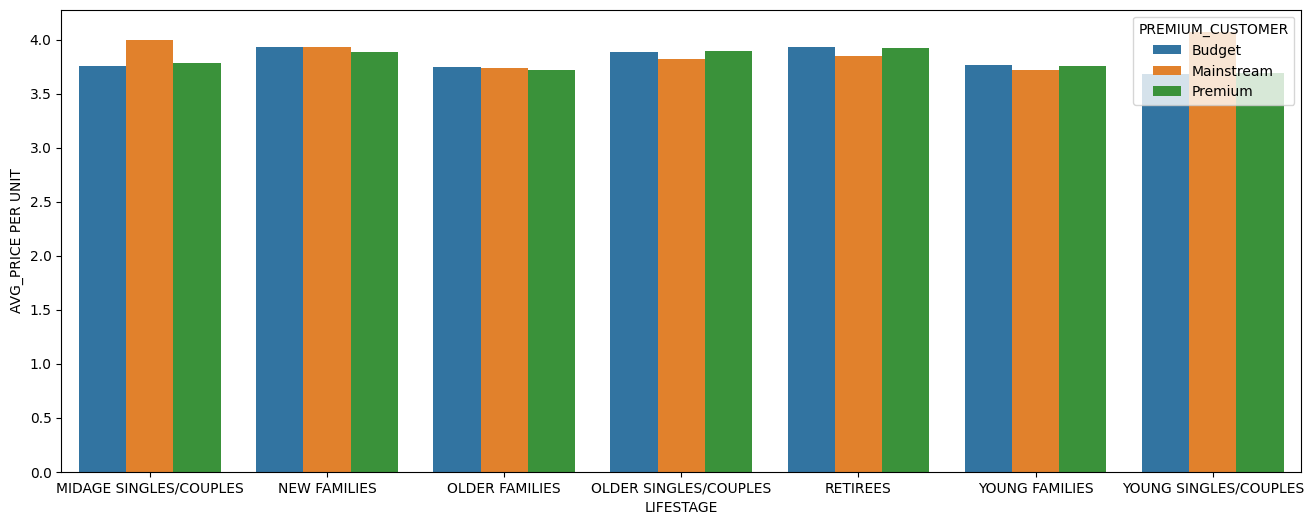

In [ ]:
plt.figure(figsize=(16, 6))
sns.barplot(
    data=avg_price_per_unit,
    x='LIFESTAGE',
    y='AVG_PRICE PER UNIT',
    hue='PREMIUM_CUSTOMER'
)

PERFORMING T-TEST

In [ ]:
from scipy.stats import ttest_ind

merge_df['PRICE_PER_UNIT'] = merge_df['TOT_SALES'] / merge_df['PROD_QTY']


mainstream_prices = merge_df[merge_df['PREMIUM_CUSTOMER'] == 'Mainstream']['PRICE_PER_UNIT']
premium_prices = merge_df[merge_df['PREMIUM_CUSTOMER'] == 'Premium']['PRICE_PER_UNIT']

t_stat_1, p_val_1 = ttest_ind(mainstream_prices, premium_prices, equal_var=False)
print("Mainstream vs Premium:")
print("T-statistic:", t_stat_1)
print("P-value:", p_val_1)


Mainstream vs Premium:
T-statistic: 11.05723574336507
P-value: 2.0788364041187993e-28


In [ ]:
budget_young_midage = merge_df[
    (merge_df['LIFESTAGE'].isin(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES'])) &
    (merge_df['PREMIUM_CUSTOMER'] == 'Budget')
]['PRICE_PER_UNIT']

all_other_customers = merge_df[
    ~((merge_df['LIFESTAGE'].isin(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES'])) &
      (merge_df['PREMIUM_CUSTOMER'] == 'Budget'))
]['PRICE_PER_UNIT']

t_stat_2, p_val_2 = ttest_ind(budget_young_midage, all_other_customers, equal_var=False)
print("\nBudget - Young & Midage Singles/Couples vs Others:")
print("T-statistic:", t_stat_2)
print("P-value:", p_val_2)



Budget - Young & Midage Singles/Couples vs Others:
T-statistic: -15.67751711716724
P-value: 5.977489696404423e-55


AFFINITY TESTING

In [ ]:
mainstream_young_df= merge_df[(merge_df['PREMIUM_CUSTOMER']=='Mainstream') & (merge_df['LIFESTAGE']=='YOUNG SINGLES/COUPLES')]

segment_brand_qty= mainstream_young_df.groupby('BRAND_NAME')['PROD_QTY'].sum()  # Quantity calculated for each brand

overall_qty= merge_df.groupby('BRAND_NAME')['PROD_QTY'].sum()  # Quantity calculated for all brands

In [ ]:
segment_brand_share = segment_brand_qty / segment_brand_qty.sum()
overall_brand_share = overall_qty / overall_qty.sum()

lift = (segment_brand_share / overall_brand_share).sort_values(ascending=False)
print(lift.head(10))  # Top 10 over-indexed brands for this segment


BRAND_NAME
Tyrrells     1.206896
Twisties     1.199068
Doritos      1.194811
Kettle       1.178124
Tostitos     1.177959
Pringles     1.169853
Grain        1.145267
Cobs         1.130662
Infuzions    1.121906
Thins        1.054597
Name: PROD_QTY, dtype: float64
